<a href="https://colab.research.google.com/github/miteshtiwary123/Concrete-strength-prediction/blob/main/Concrete_Strength_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Concrete Compressive Strength.csv')

In [ ]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [ ]:
df.dtypes

Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                  int64
Concrete compressive strength(MPa, megapascals)          float64
dtype: object

**We are changing all the columns name so we can do it directly, if we want to change only few columns then we can use key value pair**

In [ ]:
df.columns = ['cement', 'slag', 'ash', 'Water','superplastic','coarseagg','fineagg','age','strength']

In [ ]:
df.head()

,cement,slag,ash,Water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [ ]:
df.shape

(1030, 9)

In [ ]:
df.isnull().sum()

cement          0
slag            0
ash             0
Water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.165631,104.507142,102.000000,192.375000,272.900000,350.000000,540.000000
slag,1030.0,73.895485,86.279104,0.000000,0.000000,22.000000,142.950000,359.400000
ash,1030.0,54.187136,63.996469,0.000000,0.000000,0.000000,118.270000,200.100000
Water,1030.0,181.566359,21.355567,121.750000,164.900000,185.000000,192.000000,247.000000
superplastic,1030.0,6.203112,5.973492,0.000000,0.000000,6.350000,10.160000,32.200000
coarseagg,1030.0,972.918592,77.753818,801.000000,932.000000,968.000000,1029.400000,1145.000000
fineagg,1030.0,773.578883,80.175427,594.000000,730.950000,779.510000,824.000000,992.600000
age,1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
strength,1030.0,35.817836,16.705679,2.331808,23.707115,34.442774,46.136287,82.599225


#Exploratory Data Analysis

###Checking outlier in **CEMENT**

In [ ]:
from scipy import stats

Q1=df['cement'].quantile(q=0.25)
Q3=df['cement'].quantile(q=0.75)

print('1st quartile (Q1) is: ',Q1)
print('3rd quartile (Q3) is: ',Q3)
print('Interquartile range (IQR) is ',stats.iqr(df['cement']))

1st quartile (Q1) is:  192.375
3rd quartile (Q3) is:  350.0
Interquartile range (IQR) is  157.625


In [ ]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outlier limit in cement: ',L_outliers)
print('Upper outlier limit in cement: ',U_outliers)

Lower outlier limit in cement:  -44.0625
Upper outlier limit in cement:  586.4375


In [ ]:
print('Number of outliers in cement upper: ', df[df['cement']>586.4375]['cement'].count())
print('Number of outliers in cement lower: ', df[df['cement']<-44.0625]['cement'].count())

Number of outliers in cement upper:  0
Number of outliers in cement lower:  0


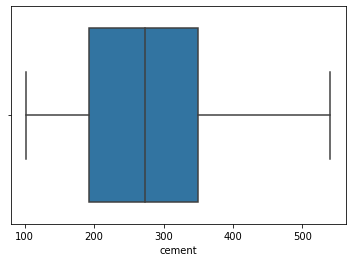

In [ ]:
sns.boxplot(x='cement', data=df)

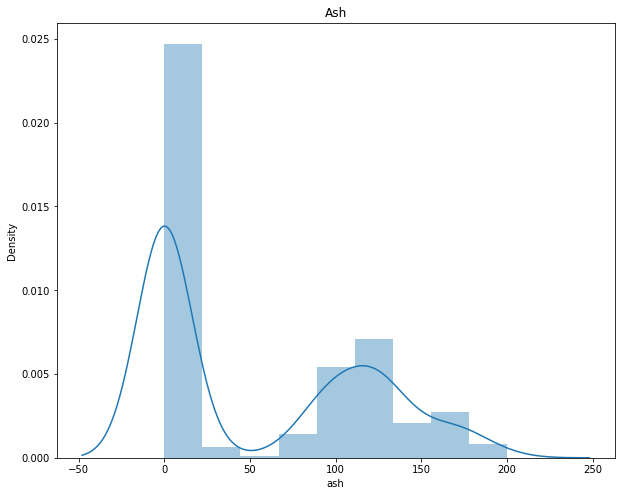

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(df['ash']).set_title('Ash')
plt.show()

###Checking outlier in **WATER**

In [ ]:
from scipy import stats

W_Q1=df['Water'].quantile(q=0.25)
W_Q3=df['Water'].quantile(q=0.75)

print('1st quartile (Q1) is: ',W_Q1)
print('3rd quartile (Q3) is: ',W_Q3)
print('Interquartile range (IQR) is ',stats.iqr(df['Water']))

1st quartile (Q1) is:  164.9
3rd quartile (Q3) is:  192.0
Interquartile range (IQR) is  27.099999999999994


In [ ]:
WL_outliers=W_Q1-1.5*(W_Q3-W_Q1)
WU_outliers=W_Q3+1.5*(W_Q3-W_Q1)
print('Lower outlier limit in water: ',WL_outliers)
print('Upper outlier limit in water: ',WU_outliers)

Lower outlier limit in water:  124.25000000000001
Upper outlier limit in water:  232.64999999999998


In [ ]:
print('Number of outliers in water upper: ', df[df['Water']>232.64999999999998]['Water'].count())
print('Number of outliers in water lower: ', df[df['Water']<124.25000000000001]['Water'].count())

Number of outliers in water upper:  4
Number of outliers in water lower:  5


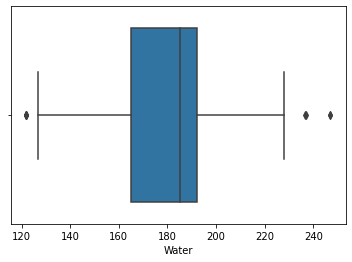

In [ ]:
sns.boxplot(x='Water', data=df)

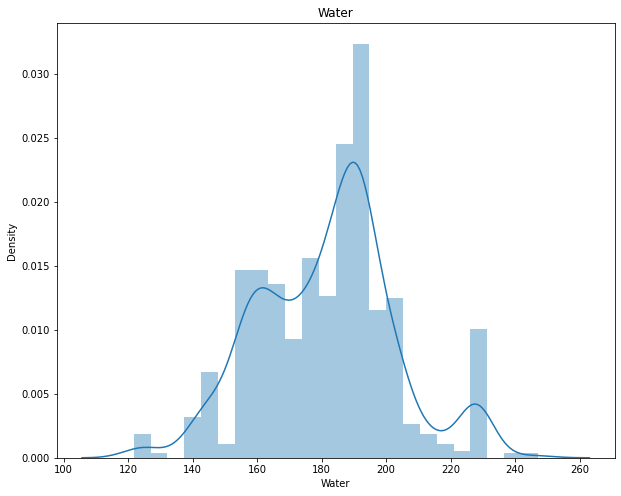

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(df['Water']).set_title('Water')
plt.show()

###Checking outlier in **SLAG**

In [ ]:
Q1=df['slag'].quantile(q=0.25)
Q3=df['slag'].quantile(q=0.75)

In [ ]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)

print('Lower outlier in water: ',L_outliers)
print('Upper outlier in water: ',U_outliers)

Lower outlier in water:  -214.42499999999998
Upper outlier in water:  357.375


In [ ]:
print('Number of outliers in slag upper: ', df[df['slag']>357.375]['slag'].count())
print('Number of outliers in slag lower: ', df[df['slag']<-214.425]['slag'].count())

Number of outliers in slag upper:  2
Number of outliers in slag lower:  0


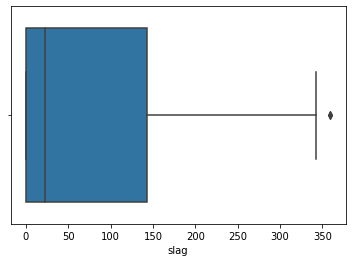

In [ ]:
sns.boxplot(x='slag', data=df, orient='h')

###Checking outlier in **AGE**

In [ ]:
Q1=df['age'].quantile(q=0.25)
Q3=df['age'].quantile(q=0.75)

In [ ]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)

print('Lower outlier in age: ',L_outliers)
print('Upper outlier in age: ',U_outliers)

Lower outlier in age:  -66.5
Upper outlier in age:  129.5


In [ ]:
print('Number of outliers in age upper: ', df[df['age']>129.5]['age'].count())
print('Number of outliers in age lower: ', df[df['age']<-66.5]['age'].count())

Number of outliers in age upper:  59
Number of outliers in age lower:  0


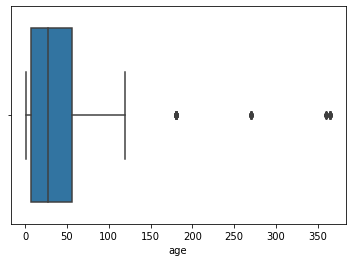

In [ ]:
sns.boxplot(x='age', data=df)

###Checking outlier in **ASH**

In [ ]:
Q1=df['ash'].quantile(q=0.25)
Q3=df['ash'].quantile(q=0.75)

In [ ]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)

print('Lower outlier in ash: ',L_outliers)
print('Upper outlier in ash: ',U_outliers)

Lower outlier in ash:  -177.405
Upper outlier in ash:  295.675


In [ ]:
print('Number of outliers in ash upper: ', df[df['ash']>295.75]['ash'].count())
print('Number of outliers in ash lower: ', df[df['ash']<-177.45]['ash'].count())

Number of outliers in ash upper:  0
Number of outliers in ash lower:  0


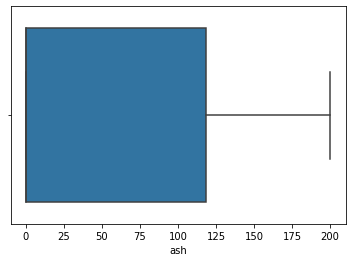

In [ ]:
sns.boxplot(x='ash', data=df, orient='h')

##Multivariate Analysis

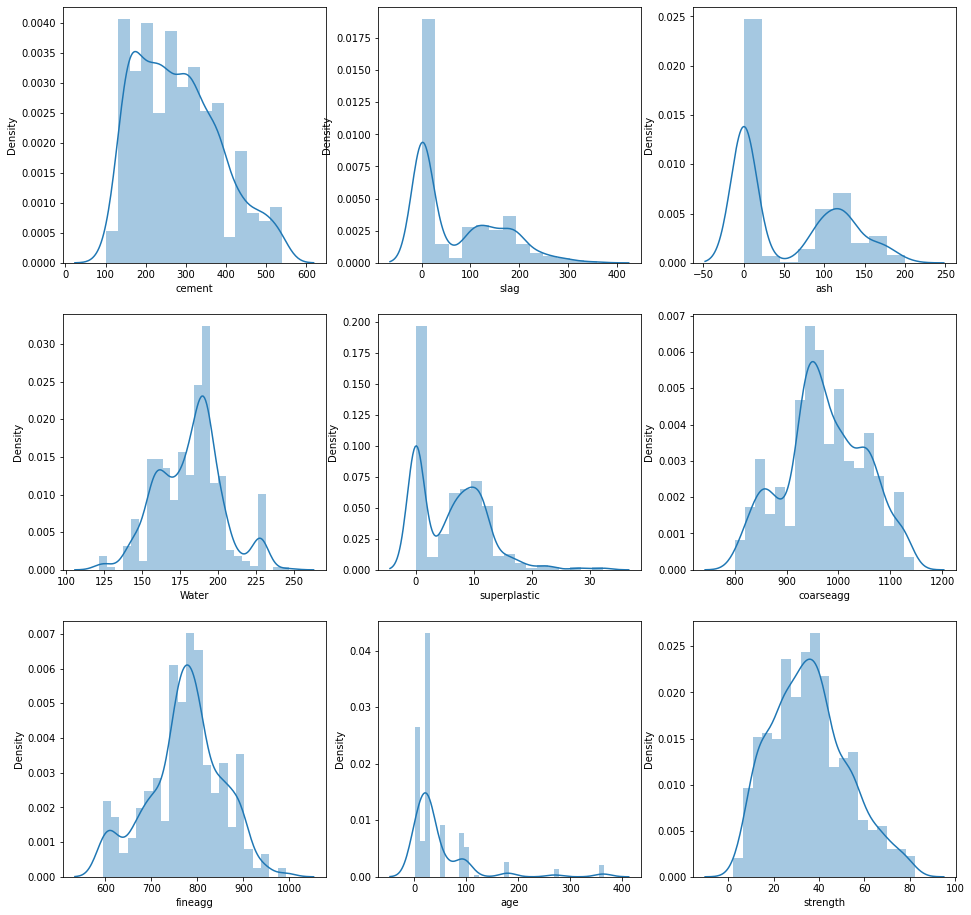

In [ ]:
fig,ax2 = plt.subplots(3,3,figsize=(16,16))
sns.distplot(df['cement'],ax=ax2[0][0])
sns.distplot(df['slag'],ax=ax2[0][1])
sns.distplot(df['ash'],ax=ax2[0][2])
sns.distplot(df['Water'],ax=ax2[1][0])
sns.distplot(df['superplastic'],ax=ax2[1][1])
sns.distplot(df['coarseagg'],ax=ax2[1][2])
sns.distplot(df['fineagg'],ax=ax2[2][0])
sns.distplot(df['age'],ax=ax2[2][1])
sns.distplot(df['strength'],ax=ax2[2][2])

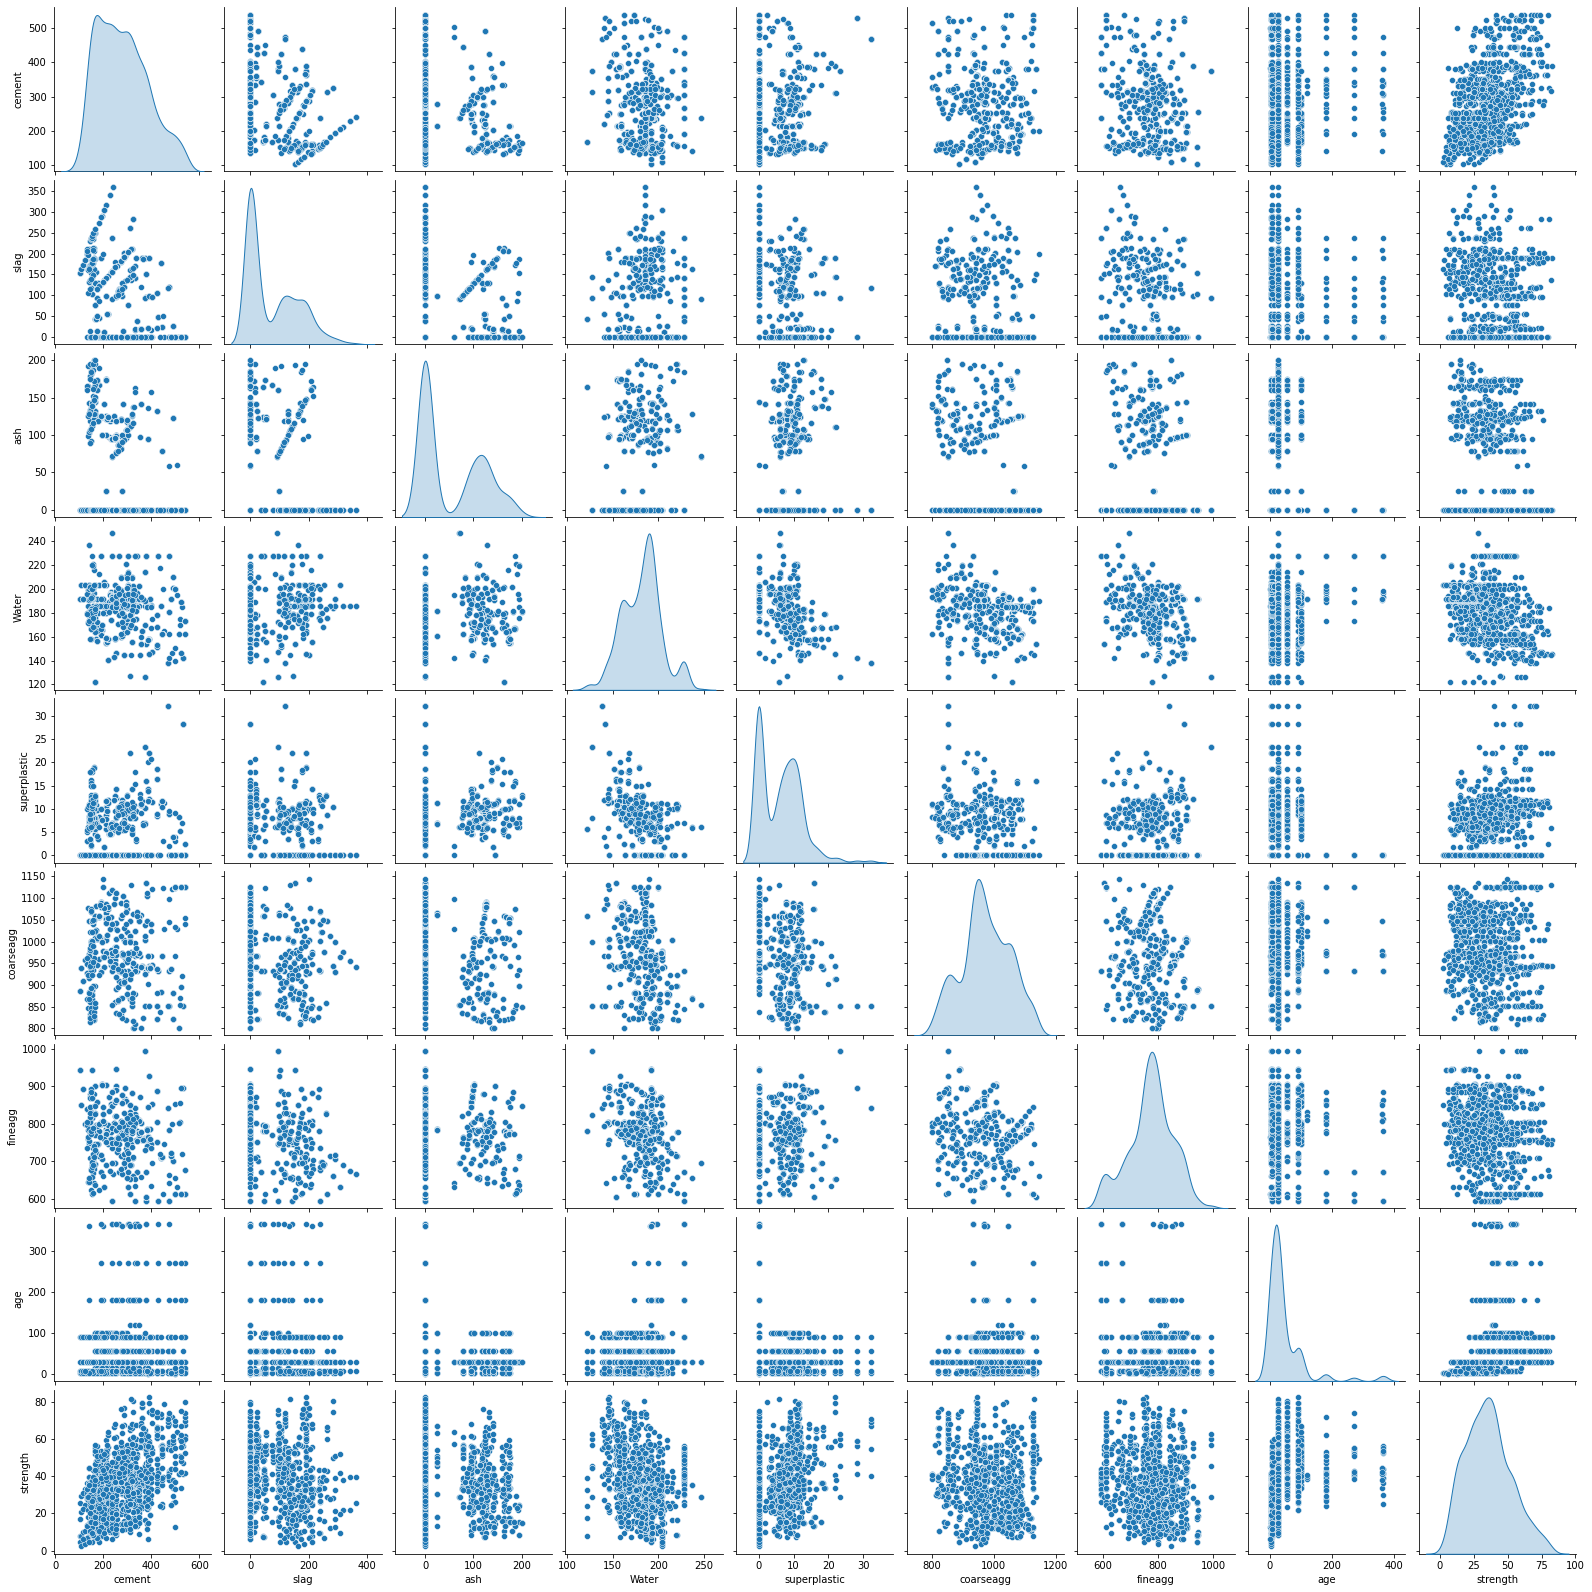

In [ ]:
sns.pairplot(df, diag_kind='kde')

### **Correlation between variables**

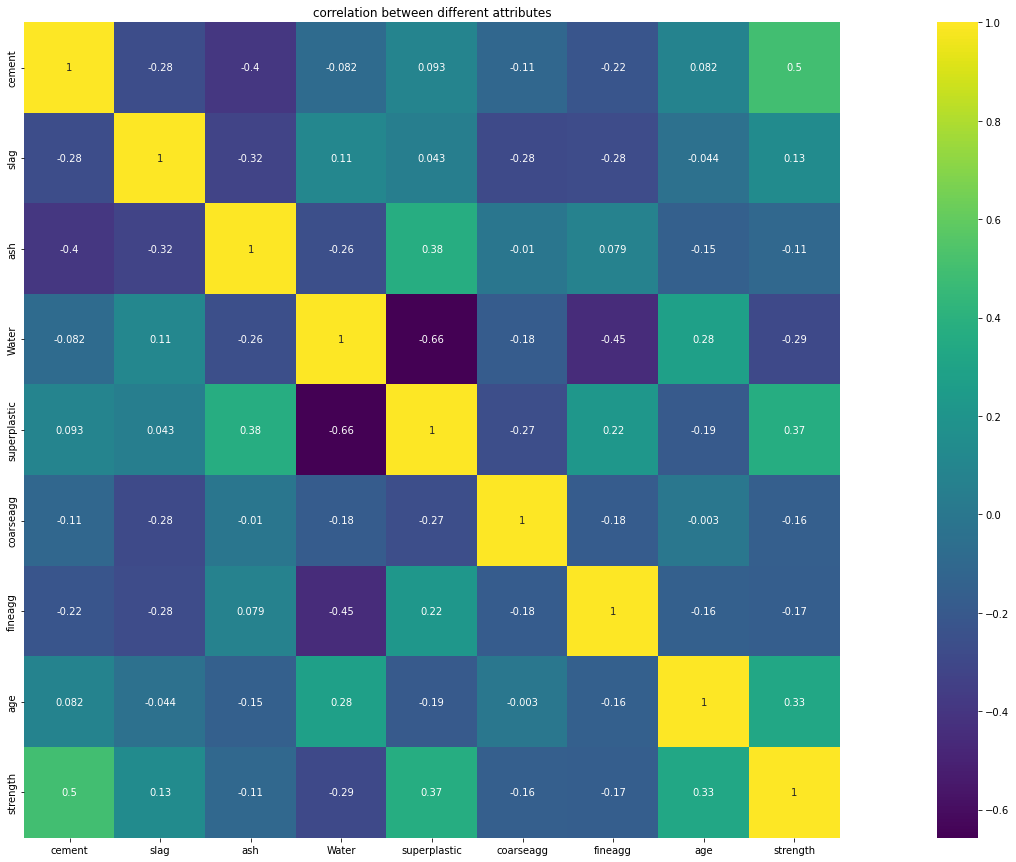

In [ ]:
plt.figure(figsize=(35,15))
sns.heatmap(df.corr(), vmax=1, square=True, annot=True, cmap='viridis')
plt.title("correlation between different attributes")
plt.show()

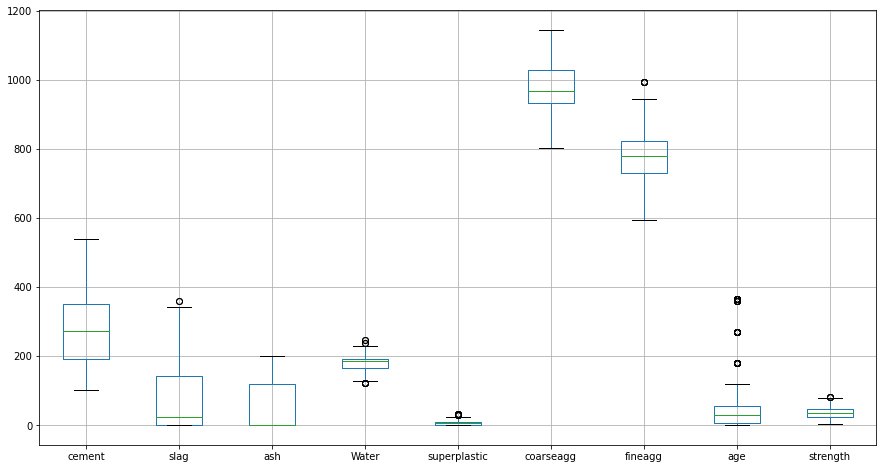

In [ ]:
df.boxplot(figsize=(15,8))

###Checking for outliers

In [ ]:
print('Outliers in cement: ', df[((df.cement - df.cement.mean())/df.cement.std()).abs()>3]['cement'].count())
print('Outliers in slag: ', df[((df.slag - df.slag.mean())/df.slag.std()).abs()>3]['slag'].count())
print('Outliers in ash: ', df[((df.ash - df.ash.mean())/df.ash.std()).abs()>3]['ash'].count())
print('Outliers in water: ', df[((df.Water - df.Water.mean())/df.Water.std()).abs()>3]['Water'].count())
print('Outliers in superplastic: ', df[((df.superplastic - df.superplastic.mean())/df.superplastic.std()).abs()>3]['superplastic'].count())
print('Outliers in coarseagg: ', df[((df.coarseagg - df.coarseagg.mean())/df.coarseagg.std()).abs()>3]['coarseagg'].count())
print('Outliers in fineagg: ', df[((df.fineagg - df.fineagg.mean())/df.fineagg.std()).abs()>3]['fineagg'].count())
print('Outliers in age: ', df[((df.age - df.age.mean())/df.age.std()).abs()>3]['age'].count())

Outliers in cement:  0
Outliers in slag:  4
Outliers in ash:  0
Outliers in water:  2
Outliers in superplastic:  10
Outliers in coarseagg:  0
Outliers in fineagg:  0
Outliers in age:  33


###Replacing outliers by Medians

In [ ]:
for cols in df.columns[:-1]:
  Q1 = df[cols].quantile(0.25)
  Q3 = df[cols].quantile(0.75)
  iqr = Q3- Q1
  low = Q1-1.5*iqr
  high = Q3+1.5*iqr
  df.loc[(df[cols]<low) | (df[cols]>high), cols] = df[cols].median()

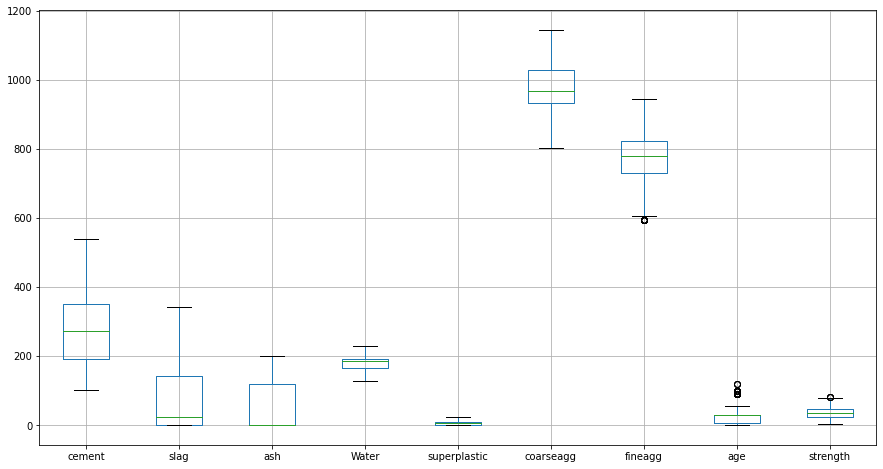

In [ ]:
df.boxplot(figsize=(15,8))

#Feature engineering and model building

In [ ]:
df.head()

,cement,slag,ash,Water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28,44.296075


In [ ]:
X = df.drop('strength', axis=1)
y = df['strength']

In [ ]:
from scipy.stats import zscore
Xscaled = X.apply(zscore)
Xscaled_df = pd.DataFrame(Xscaled, columns=df.columns)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xscaled, y, test_size=0.3, random_state=1)

## Importing all important libraries using pyforest

In [ ]:
!pip install pyforest

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14607 sha256=fd454544882f97c0877fc31062f9d5e8c33a6bcdaf0af5e39a1255c769e0bd16
  Stored in directory: /root/.cache/pip/wheels/21/2d/19/8b5488f0caea6d892333413745640532d40d70e6b5351d7633
Successfully built pyforest


In [ ]:
from pyforest import*
lazy_imports()

['from sklearn.ensemble import GradientBoostingRegressor',
 'from sklearn.preprocessing import RobustScaler',
 'import seaborn as sns',
 'import plotly.graph_objs as go',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'import torch',
 'from fbprophet import Prophet',
 'from sklearn.feature_extraction.text import CountVectorizer',
 'import dash',
 'from sklearn import metrics',
 'from sklearn.linear_model import Ridge',
 'from sklearn.preprocessing import MinMaxScaler',
 'import xgboost as xgb',
 'import os',
 'from sklearn.decomposition import PCA',
 'from sklearn import svm',
 'import plotly as py',
 'import plotly.express as px',
 'import spacy',
 'from PIL import Image',
 'from sklearn.model_selection import cross_val_score',
 'from openpyxl import load_workbook',
 'from sklearn.ensemble import RandomForestRegressor',
 'import awswrangler as wr',
 'import lightgbm as lgb',
 'import tensorflow as tf',
 'from sklearn.linear_model import LogisticRegression',
 'from scipy 

##Random forest regression

In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

<IPython.core.display.Javascript object>

RandomForestRegressor()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
model.score(X_train, y_train)

0.9818361849323767

In [ ]:
model.score(X_test, y_test)

0.8824564894568022

In [ ]:
acc_r2 = metrics.r2_score(y_test, y_pred)
acc_r2

<IPython.core.display.Javascript object>

0.8824564894568022

In [ ]:
metrics.mean_squared_error(y_test, y_pred)

<IPython.core.display.Javascript object>

30.809031005692788

In [ ]:
results_1 = pd.DataFrame({'Algorithm':['Random Forest'], 'accuracy':acc_r2}, index={'1'})
results = results_1[['Algorithm', 'accuracy']]
results

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.882456


##KFold Cross Validation for Random forest

In [ ]:
k = 20
kfold = KFold(n_splits=k)
k_results = cross_val_score(model, X, y, cv=kfold)
accuracy = np.mean(abs(k_results))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.7644468285612696

In [ ]:
random_re = pd.DataFrame({'Algorithm': ['Random Forest Regressor k_fold'], 'accuracy': accuracy},index={'2'})
results = pd.concat([results, random_re])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.882456
2,Random Forest Regressor k_fold,0.764447


##Gradient Boosting Regressor

In [ ]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

<IPython.core.display.Javascript object>

GradientBoostingRegressor()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
model.score(X_train, y_train)

0.9479484642544256

In [ ]:
model.score(X_test, y_test)

0.8822428665028319

In [ ]:
metrics.mean_squared_error(y_test, y_pred)

<IPython.core.display.Javascript object>

30.86502317558788

In [ ]:
acc_G=metrics.r2_score(y_test, y_pred)
acc_G

<IPython.core.display.Javascript object>

0.8822428665028319

In [ ]:
gradient_re = pd.DataFrame({'Algorithm': ['Gradient Boost Regressor'], 'accuracy': acc_G},index={'3'})
results = pd.concat([results, gradient_re])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.882456
2,Random Forest Regressor k_fold,0.764447
3,Gradient Boost Regressor,0.882243


##KFold cross validation for Gradient Boosting

In [ ]:
k = 20

kfold = KFold(n_splits=k)
results_3 = cross_val_score(model, X, y, cv=kfold)
accuracy=np.mean(abs(results_3))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.7605094513632472

In [ ]:
gradient_k = pd.DataFrame({'Algorithm': ['Gradient Boost Regressor k fold'], 'accuracy': accuracy},index={'4'})
results = pd.concat([results, gradient_k])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.882456
2,Random Forest Regressor k_fold,0.764447
3,Gradient Boost Regressor,0.882243
4,Gradient Boost Regressor k fold,0.760509


##Ada Boost Regressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
model = AdaBoostRegressor()
model.fit(X_train, y_train)

AdaBoostRegressor()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
model.score(X_train, y_train)

0.8116623959506127

In [ ]:
model.score(X_test, y_test)

0.7562240879985938

In [ ]:
acc_ada = metrics.r2_score(y_test, y_pred)
acc_ada

<IPython.core.display.Javascript object>

0.7562240879985938

In [ ]:
acc_ada = pd.DataFrame({'Algorithm': ['Ada Boost Regressor'], 'accuracy': acc_ada},index={'5'})
results = pd.concat([results, acc_ada])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.882456
2,Random Forest Regressor k_fold,0.764447
3,Gradient Boost Regressor,0.882243
4,Gradient Boost Regressor k fold,0.760509
5,Ada Boost Regressor,0.756224


KFold Cross Validation for ada boost

In [ ]:
k = 20
kfold = KFold(n_splits=k)
results_4 = cross_val_score(model, X, y, cv=kfold)
accuracy = np.mean(abs(results_4))
accuracy 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.597731962773354

In [ ]:
acc_AdaC = pd.DataFrame({'Algorithm': ['Ada Boost Regressor k fold'], 'accuracy': accuracy},index={'6'})
results = pd.concat([results, acc_AdaC])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.882456
2,Random Forest Regressor k_fold,0.764447
3,Gradient Boost Regressor,0.882243
4,Gradient Boost Regressor k fold,0.760509
5,Ada Boost Regressor,0.756224
6,Ada Boost Regressor k fold,0.597732


##KNN Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

diff_k = []
for i in range(1,45):
  knn = KNeighborsRegressor(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  diff_k.append(np.mean(pred_i != y_test))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Mean errors')

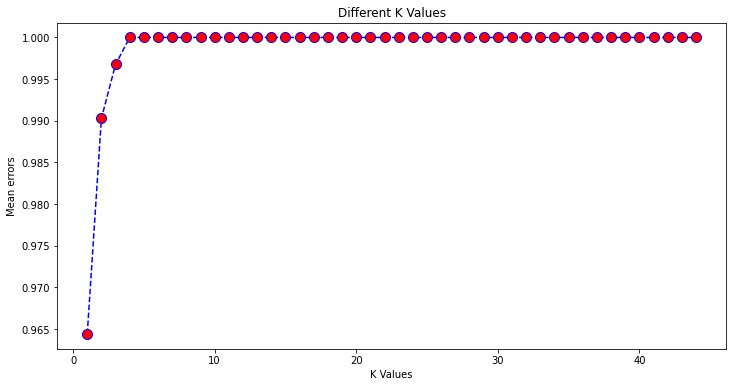

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(1,45),diff_k,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Different K Values')
plt.xlabel('K Values')
plt.ylabel('Mean errors')

In [ ]:
#k=3 is a better choice from the above plot

model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
acc_KNN=metrics.r2_score(y_test, y_pred)
acc_KNN

<IPython.core.display.Javascript object>

0.7532893897580075

In [ ]:
metrics.mean_squared_error(y_test, y_pred)

<IPython.core.display.Javascript object>

64.66469144279613

In [ ]:
KNN_df = pd.DataFrame({'Algorithm':['KNN Regressor'], 'accuracy': [acc_KNN]}, index={'7'})
results = pd.concat([results, KNN_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.882456
2,Random Forest Regressor k_fold,0.764447
3,Gradient Boost Regressor,0.882243
4,Gradient Boost Regressor k fold,0.760509
5,Ada Boost Regressor,0.756224
6,Ada Boost Regressor k fold,0.597732
7,KNN Regressor,0.753289


##KFold validation for KNN

In [ ]:
k = 20

kfold = KFold(n_splits=k)
results_5 = cross_val_score(model, X, y, cv=kfold)
accuracy=np.mean(abs(results_5))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.6940334677297888

In [ ]:
KNNfold_df = pd.DataFrame({'Algorithm': ['KNN Regressor k fold'], 'accuracy': accuracy},index={'8'})
results = pd.concat([results, KNNfold_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.882456
2,Random Forest Regressor k_fold,0.764447
3,Gradient Boost Regressor,0.882243
4,Gradient Boost Regressor k fold,0.760509
5,Ada Boost Regressor,0.756224
6,Ada Boost Regressor k fold,0.597732
7,KNN Regressor,0.753289
8,KNN Regressor k fold,0.694033


##Bagging Regressor

In [ ]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
model = BaggingRegressor()
model.fit(X_train,y_train)

BaggingRegressor()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
model.score(X_train, y_train)

0.977635942504356

In [ ]:
model.score(X_test, y_test)

0.8721732677177496

In [ ]:
acc_BR=metrics.r2_score(y_test, y_pred)
acc_BR

<IPython.core.display.Javascript object>

0.8721732677177496

In [ ]:
metrics.mean_squared_error(y_test, y_pred)

<IPython.core.display.Javascript object>

33.50434013788394

In [ ]:
Bagging_df = pd.DataFrame({'Algorithm': ['Bagging Regressor'], 'accuracy': acc_BR},index={'9'})
results = pd.concat([results, Bagging_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.882456
2,Random Forest Regressor k_fold,0.764447
3,Gradient Boost Regressor,0.882243
4,Gradient Boost Regressor k fold,0.760509
5,Ada Boost Regressor,0.756224
6,Ada Boost Regressor k fold,0.597732
7,KNN Regressor,0.753289
8,KNN Regressor k fold,0.694033
9,Bagging Regressor,0.872173


##KFold validation for bagging regressor

In [ ]:
k = 20

kfold = KFold(n_splits=k)
results_7 = cross_val_score(model, X, y, cv=kfold)
accuracy=np.mean(abs(results_7))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.7277325090159301

In [ ]:
BaggingKFold_df = pd.DataFrame({'Algorithm': ['Bagging Regressor k fold'], 'accuracy': accuracy},index={'10'})
results = pd.concat([results, BaggingKFold_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.882456
2,Random Forest Regressor k_fold,0.764447
3,Gradient Boost Regressor,0.882243
4,Gradient Boost Regressor k fold,0.760509
5,Ada Boost Regressor,0.756224
6,Ada Boost Regressor k fold,0.597732
7,KNN Regressor,0.753289
8,KNN Regressor k fold,0.694033
9,Bagging Regressor,0.872173
10,Bagging Regressor k fold,0.727733


In [ ]:
from sklearn.svm import SVR
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(kernel='linear')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
model.score(X_train, y_train)

0.7296534161238828

In [ ]:
acc_SVR=metrics.r2_score(y_test, y_pred)
acc_SVR

<IPython.core.display.Javascript object>

0.6550336531634067

In [ ]:
metrics.mean_squared_error(y_test, y_pred)

<IPython.core.display.Javascript object>

90.41825300685834

In [ ]:
SVR_df = pd.DataFrame({'Algorithm': ['Support Vector Regressor'], 'accuracy': acc_SVR},index={'11'})
results = pd.concat([results, SVR_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.882456
2,Random Forest Regressor k_fold,0.764447
3,Gradient Boost Regressor,0.882243
4,Gradient Boost Regressor k fold,0.760509
5,Ada Boost Regressor,0.756224
6,Ada Boost Regressor k fold,0.597732
7,KNN Regressor,0.753289
8,KNN Regressor k fold,0.694033
9,Bagging Regressor,0.872173
10,Bagging Regressor k fold,0.727733


##KFold validation for SVR

In [ ]:
k = 20

kfold = KFold(n_splits=k)
results_8 = cross_val_score(model, X, y, cv=kfold)
accuracy=np.mean(abs(results_8))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.6186255141150117

In [109]:
SVRKFold_df = pd.DataFrame({'Algorithm': ['Support Vector Regressor k fold'], 'accuracy': accuracy},index={'12'})
results = pd.concat([results, SVRKFold_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.882456
2,Random Forest Regressor k_fold,0.764447
3,Gradient Boost Regressor,0.882243
4,Gradient Boost Regressor k fold,0.760509
5,Ada Boost Regressor,0.756224
6,Ada Boost Regressor k fold,0.597732
7,KNN Regressor,0.753289
8,KNN Regressor k fold,0.694033
9,Bagging Regressor,0.872173
10,Bagging Regressor k fold,0.727733


##XGBoost Regressor

In [110]:
import xgboost as xgb

In [111]:
from xgboost.sklearn import XGBRegressor

xgr = XGBRegressor()
xgr.fit(X_train, y_train)

[07:31:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [112]:
y_pred = xgr.predict(X_test)

In [113]:
xgr.score(X_train, y_train)

0.9440357958906394

In [114]:
acc_XGB=metrics.r2_score(y_test, y_pred)
acc_XGB

<IPython.core.display.Javascript object>

0.87975757580099

In [115]:
metrics.mean_squared_error(y_test, y_pred)

<IPython.core.display.Javascript object>

31.516436409184184

In [116]:
XGB_df = pd.DataFrame({'Algorithm': ['XGBoost Regressor'], 'accuracy': [acc_XGB]},index={'13'})
results = pd.concat([results, XGB_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.882456
2,Random Forest Regressor k_fold,0.764447
3,Gradient Boost Regressor,0.882243
4,Gradient Boost Regressor k fold,0.760509
5,Ada Boost Regressor,0.756224
6,Ada Boost Regressor k fold,0.597732
7,KNN Regressor,0.753289
8,KNN Regressor k fold,0.694033
9,Bagging Regressor,0.872173
10,Bagging Regressor k fold,0.727733


##Decision Tree Regressor

In [117]:
from sklearn.tree import DecisionTreeRegressor

dec_model = DecisionTreeRegressor()
dec_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [118]:
print('Feature importance: \n',pd.DataFrame(dec_model.feature_importances_,columns=['Importance'],index=X_train.columns))

<IPython.core.display.Javascript object>

Feature importance: 
               Importance
cement          0.307281
slag            0.059353
ash             0.008359
Water           0.122197
superplastic    0.053978
coarseagg       0.026735
fineagg         0.049335
age             0.372761


In [119]:
y_pred = dec_model.predict(X_test)

In [120]:
dec_model.score(X_train, y_train)

0.9938748100766917

In [121]:
dec_model.score(X_test, y_test)

0.7591068890509756

In [122]:
acc_DT=metrics.r2_score(y_test, y_pred)
acc_DT

<IPython.core.display.Javascript object>

0.7591068890509756

In [123]:
DT_df = pd.DataFrame({'Algorithm': ['Decision Tree Regressor 1'], 'accuracy': [acc_DT]},index={'14'})
results = pd.concat([results, DT_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.882456
2,Random Forest Regressor k_fold,0.764447
3,Gradient Boost Regressor,0.882243
4,Gradient Boost Regressor k fold,0.760509
5,Ada Boost Regressor,0.756224
6,Ada Boost Regressor k fold,0.597732
7,KNN Regressor,0.753289
8,KNN Regressor k fold,0.694033
9,Bagging Regressor,0.872173
10,Bagging Regressor k fold,0.727733


##KFold validation for Decision Tree

In [124]:
k = 20

kfold = KFold(n_splits=k)
results_9 = cross_val_score(dec_model, X, y, cv=kfold)
accuracy=np.mean(abs(results_9))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.6179025242873106

In [125]:
DCT_df = pd.DataFrame({'Algorithm': ['Decision Tree Regressor k fold'], 'accuracy': accuracy},index={'15'})
results = pd.concat([results, DCT_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.882456
2,Random Forest Regressor k_fold,0.764447
3,Gradient Boost Regressor,0.882243
4,Gradient Boost Regressor k fold,0.760509
5,Ada Boost Regressor,0.756224
6,Ada Boost Regressor k fold,0.597732
7,KNN Regressor,0.753289
8,KNN Regressor k fold,0.694033
9,Bagging Regressor,0.872173
10,Bagging Regressor k fold,0.727733


###**Gradient Boost Regressor**, **Support Vector Regressor**, **Bagging Regressor** and **Random Forest** seems to do well in the scenario. We can choose either of them.